In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import os

In [ ]:
path = r'/content/drive/MyDrive/Hackathon/Hackathon_2021/FinalHackathonData/train/train.csv'
csv = pd.read_csv(path,index_col = False)
test_csv = pd.read_csv(r'/content/drive/MyDrive/Hackathon/Hackathon_2021/FinalHackathonData/test/test.csv',index_col=False)
ID = test_csv[['ID']]

In [ ]:
csv_final = csv.set_index('ID')
test_csv = test_csv.set_index('ID')
cont_csv = csv[['y','X9','X10','X11','X12','X13','X14','X15','X16']]
test_csv

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,az,v,n,f,d,t,a,w,0.260169,0.007526,0.154696,0.543315,0.220108,0.207371,0.121730,0.666667,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0
2,t,b,ai,a,d,b,g,y,0.118023,0.031068,0.221545,0.198897,0.230438,0.065939,0.115463,0.222222,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,az,v,as,f,d,a,j,j,0.262278,0.009687,0.485178,0.530523,0.414307,0.307356,0.052389,0.888889,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
4,az,l,n,f,d,z,l,n,0.184351,0.004481,0.762958,0.421362,0.654018,0.513523,0.020249,0.888889,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0
5,w,s,as,c,d,y,i,m,0.674921,0.054433,0.438336,0.916254,0.570856,0.494960,0.028590,0.555556,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410,aj,h,as,f,d,aa,j,e,0.493035,0.042929,0.520207,0.715229,0.698678,0.526700,0.016590,0.666667,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
8411,t,aa,ai,d,d,aa,j,y,0.402160,0.026473,0.510759,0.660929,0.379477,0.300188,0.060127,0.000000,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
8413,y,v,as,f,d,aa,d,w,0.511248,0.025004,0.511951,0.844571,0.553256,0.527774,0.030637,0.777778,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Binary + Continuous

In [ ]:
csv_bin_con = csv_final.drop(['y','X1','X2','X3','X4','X5','X6','X7','X8'],axis = 1)
test_bin_con = test_csv.drop(['X1','X2','X3','X4','X5','X6','X7','X8'],axis = 1)

ALL

In [ ]:
csv_full = csv_final.drop('y',axis=1)
X_all = pd.get_dummies(csv_full,columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7','X8'])
test_csv = pd.get_dummies(test_csv,columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7','X8'])

In [ ]:
len(test_csv.columns)
test_col = list(test_csv.columns)

In [ ]:
train_col = list(X_all.columns)

In [ ]:
len(set(train_col))

222

In [ ]:
len(set(test_col))

228

In [ ]:
list(set(test_col)- set(train_col))

['X3_ax',
 'X1_ae',
 'X6_t',
 'X1_an',
 'X3_u',
 'X1_av',
 'X3_aj',
 'X6_a',
 'X6_z',
 'X1_bb',
 'X3_ab',
 'X6_b',
 'X1_p',
 'X3_ad',
 'X1_ag',
 'X3_w']

In [ ]:
list(set(train_col)- set(test_col))

['X3_c',
 'X6_u',
 'X3_l',
 'X1_ab',
 'X3_ar',
 'X3_o',
 'X1_aa',
 'X1_q',
 'X3_aa',
 'X1_ac']

Only continuous

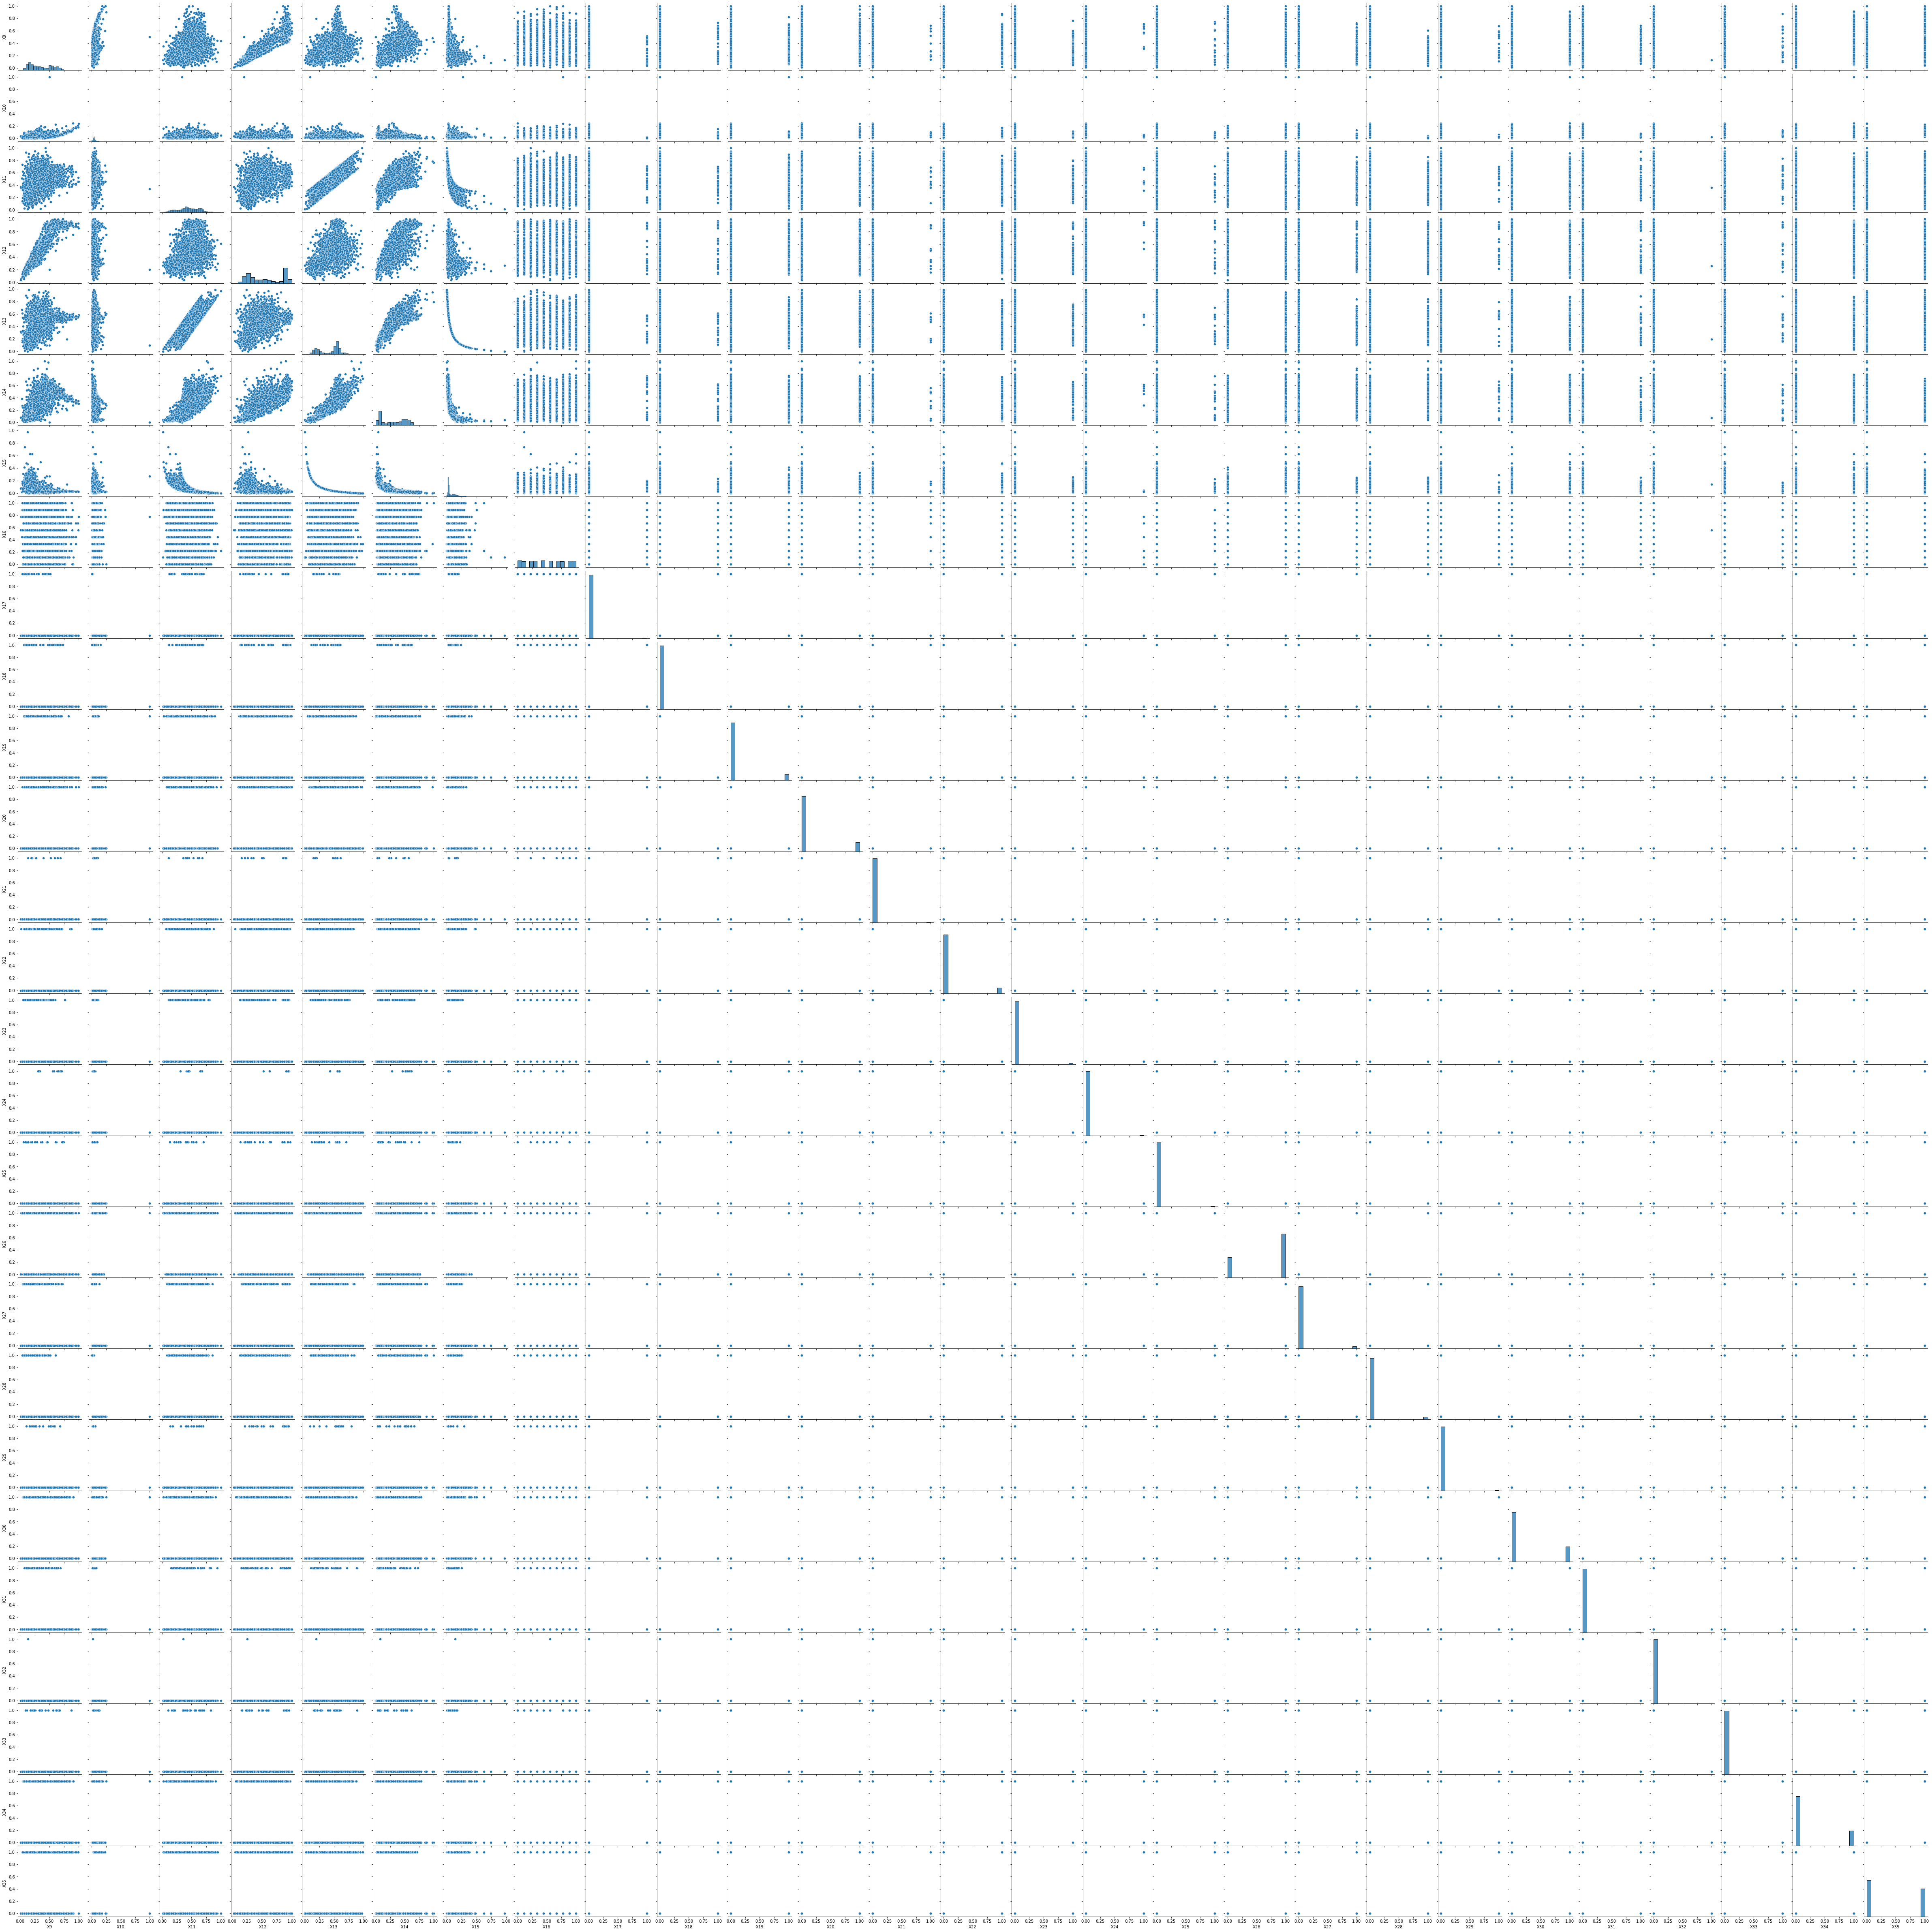

In [ ]:
sns.pairplot(csv_new)

In [ ]:
X10 = cont_csv[['X10']]
y = cont_csv[['y']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(csv_bin_con, y, test_size=0.2, random_state=42)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Random Forest

In [ ]:
randomforest = RandomForestRegressor()
randomforest.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = randomforest.predict(test_bin_con)

In [ ]:
print('The rmse of prediction is:', round(mean_squared_log_error(y_pred, y_test) ** 0.5, 5), 'R2 error:',r2_score(y_pred,y_test))

The rmse of prediction is: 0.00064 R2 error: 0.9999611049507172


In [ ]:
y_pred

array([ 80.1022,  97.9905,  82.0139, ...,  94.0024, 111.0098,  93.9982])

In [ ]:
Output = pd.DataFrame({'ID':list(ID.ID),'y': list(y_pred)})
Output
os.getcwd()

'/content'

In [ ]:
from google.colab import files
Output.to_csv('Out.csv',index= False)
files.download('Out.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>